In [8]:
import numpy as np
import pandas as pd
import lasio as ls
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import petropy as ptr
import welly 
import sklearn as skl
import folium

In [49]:
import numpy as np
import pandas as pd
import lasio as ls
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import petropy as ptr
import welly 
import sklearn as skl
import folium

def bootstrap(realizations, dataset, statistic):
   
    resampled_data = np.zeros_like(dataset)
    bootstrapped_statistic = np.zeros(realizations)
    cprob = np.zeros(realizations)
    
    for i in range(len(bootstrapped_statistic)):
        for j in range(len(resampled_data)):
            resampled_data[j] = np.random.choice(dataset)
            j+=1
        bootstrapped_statistic[i] = statistic(resampled_data)
        index = i+1
        cprob[i] = index/len(cprob)
        i+=1
 
    plt.figure(figsize=(20,6))

    plt.subplot(131)
    plt.hist(bootstrapped_statistic, bins=25, alpha=0.3, color='black', edgecolor='black', range=[np.min(bootstrapped_statistic),np.max(bootstrapped_statistic)], 
             weights = np.ones(len(bootstrapped_statistic))/len(bootstrapped_statistic))
    plt.ylabel('Probability')
    plt.xlabel('Porosity [%]')
    plt.title('Mean Porosity Histogram')
    plt.grid(True, color='black', axis='y')
    plt.axvline(np.percentile(bootstrapped_statistic,10), color='red', ls = '--', lw=2.5, label = f'P10 = {np.round(np.percentile(bootstrapped_statistic,10),2)}')
    plt.axvline(np.percentile(bootstrapped_statistic,50), color='blue', ls = '--', lw=2.5, label = f'P50 = {np.round(np.percentile(bootstrapped_statistic,50),2)}')
    plt.axvline(np.percentile(bootstrapped_statistic,90), color='green', ls = '--', lw=2.5, label = f'P90 = {np.round(np.percentile(bootstrapped_statistic,90),2)}')
    plt.legend()
    
    plt.subplot(132)
    sns.kdeplot(bootstrapped_statistic, bw_method=0.1, fill=True, color='black')
    plt.grid(True, color='gray')
    plt.xlabel('Porosity [%]')
    plt.title('Average Porosity PDF')
    plt.axvline(np.percentile(bootstrapped_statistic,10), color='red', ls = '--', lw=2.5, label = f'P10 = {np.round(np.percentile(bootstrapped_statistic,10),2)}', alpha = 0.8)
    plt.axvline(np.percentile(bootstrapped_statistic,50), color='blue', ls = '--', lw=2.5, label = f'P50 = {np.round(np.percentile(bootstrapped_statistic,50),2)}', alpha = 0.8)
    plt.axvline(np.percentile(bootstrapped_statistic,90), color='green', ls = '--', lw=2.5, label = f'P90 = {np.round(np.percentile(bootstrapped_statistic,90),2)}', alpha = 0.8)
    plt.legend()
    
    plt.subplot(133)
    plt.scatter(np.sort(bootstrapped_statistic), cprob,  s = 10, color = 'red', edgecolor = 'black')
    plt.plot((np.min(bootstrapped_statistic),np.percentile(bootstrapped_statistic,10)),(0.1,0.1),
             color='red', ls = '--', lw=2.5, label = f'P10 = {np.round(np.percentile(bootstrapped_statistic,10),2)}', alpha = 0.8)
    plt.plot((np.percentile(bootstrapped_statistic,10),np.percentile(bootstrapped_statistic,10)),(0,0.1), color='red', ls = '--', lw=2.5)
    plt.plot((np.min(bootstrapped_statistic),np.percentile(bootstrapped_statistic,50)),(0.5,0.5),
             color='blue', ls = '--', lw=2.5, label = f'P50 = {np.round(np.percentile(bootstrapped_statistic,50),2)}', alpha = 0.8)
    plt.plot((np.percentile(bootstrapped_statistic,50),np.percentile(bootstrapped_statistic,50)),(0,0.5), color='blue', ls = '--', lw=2.5)
    plt.plot((np.min(bootstrapped_statistic),np.percentile(bootstrapped_statistic,90)),(0.9,0.9),
             color='green', ls = '--', lw=2.5, label = f'P90 = {np.round(np.percentile(bootstrapped_statistic,90),2)}', alpha = 0.8)
    plt.plot((np.percentile(bootstrapped_statistic,90),np.percentile(bootstrapped_statistic,90)),(0,0.9), color='green', ls = '--', lw=2.5)
    plt.grid(True, color='gray')
    plt.xlabel('Porosity [%]')
    plt.ylabel('Cumulative Probability')
    plt.title('Average Porosity CDF')
    plt.ylim([0,1.2])
    plt.xlim([np.min(bootstrapped_statistic),np.max(bootstrapped_statistic)])
    plt.legend(loc = 'upper left')

In [50]:
df = pd.read_csv('Well_Porosity_MooseJaw.csv')
por = df['Well_Porosity'].values

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


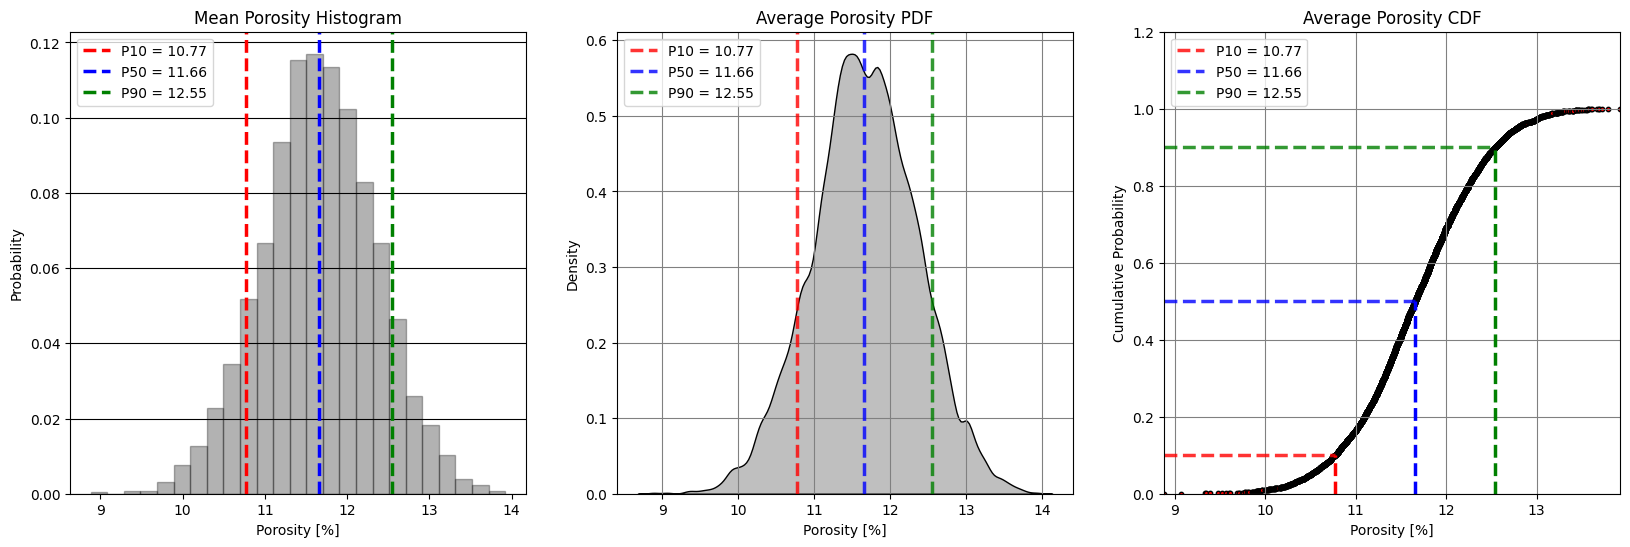

In [51]:
bootstrap(5000,por,np.average)

In [52]:
df = pd.read_csv("KE_DATA.csv")

In [53]:
porosity = np.sort(df['Phi'].values)
sw = np.sort(np.unique(df['Sw'].values))

In [54]:
porosity = porosity[5:-1]
sw = sw[1:-1]
porosity = np.array([float(x) if x is not None and str(x).replace('.','',1).isdigit() else np.nan for x in porosity])
sw = np.array([float(x) if x is not None and str(x).replace('.','',1).isdigit() else np.nan for x in sw])

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


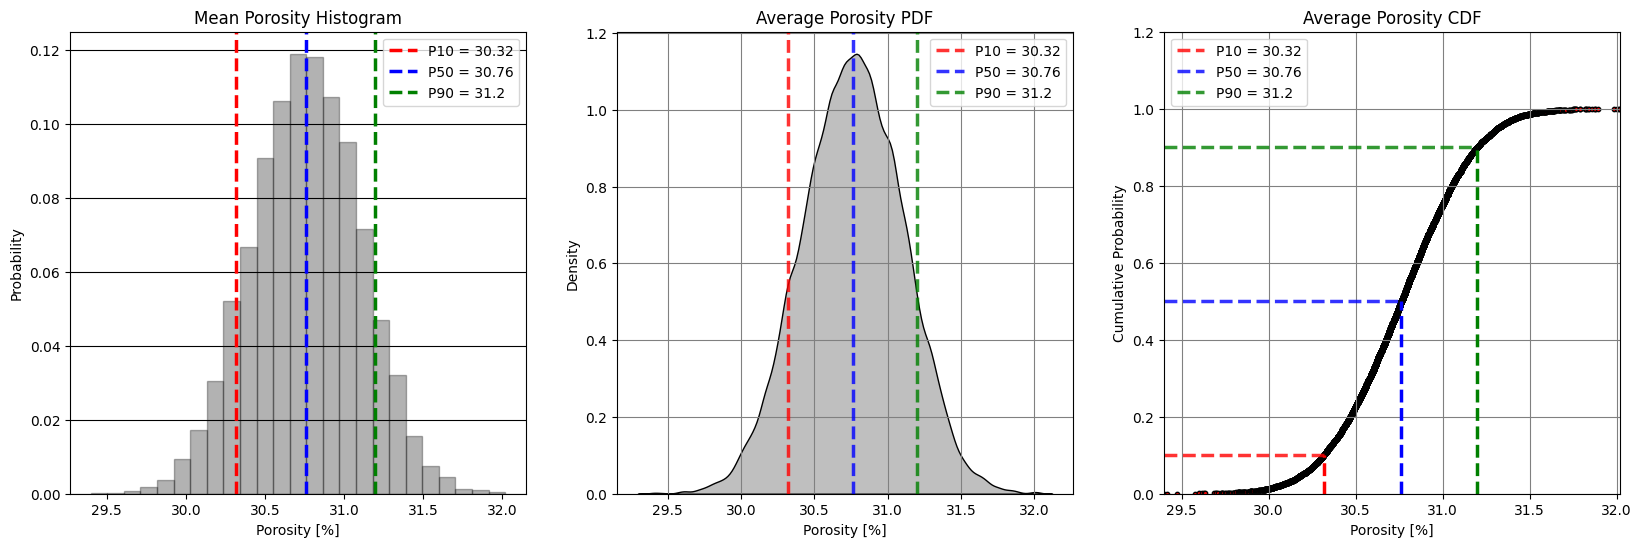

In [55]:
bootstrap(10000, porosity, np.average)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


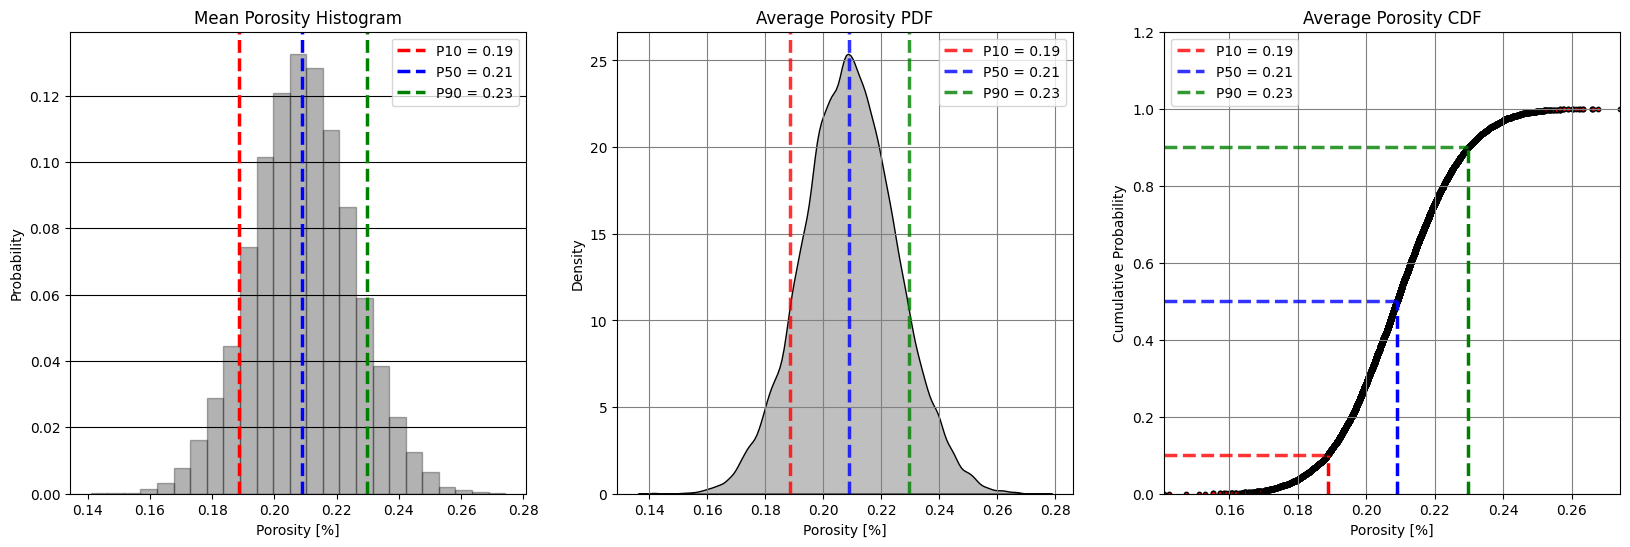

In [56]:
bootstrap(10000,sw,np.average)